<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 4 Part 1: Optical System Modeling with Aberrations</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Group #: ___________   Team Members: _______________  </b></p>

<p style="text-align: left;" ><font size="+1"><b>Objectives</b></p>

<div class="alert alert-block alert-warning">
<font color=black>

- Understand and be able to model optical phase aberrations
- Build realistic models of optical systems
- Understand basic concepts of optimization 
- Identify system parameters in real data through an optimization process

</font> 
</div>

<p style="text-align: left;" ><font size="+1"><b>Introduction / Basic Rules</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>

In this lab, you will extend the ideal optical model from Lab 3 to a more realistic optical system. In Part 1 of this lab, we will learn to model optical phase aberrations, and then look at how aberrations affect the PSF and the final image. <br/>
    
In Part 2, we will collect real data and apply the model you build in Part 1 to identify system parameters through an optimization process. <br/>
    
Recall from class notes and discussions that our new model of the coherent PSF is:
\begin{equation}
\large
h(u,v) = \frac{A}{\lambda z_i} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \mathcal{P}(x,y) \hspace{5px} \exp \bigg\{ -i \frac{2\pi}{\lambda z_i} (ux+vy)\bigg\} dx dy
\large
\end{equation} 
    
\begin{equation}
\large
\mathcal{P}(u,v) = \underbrace {P(u,v)}_{\text{amplitude}} \hspace{5px} \underbrace {\exp \big[ i \frac{2\pi}{\lambda} W(u,v) \big]}_{\text{phase}}
\large
\end{equation} 
    
And remember that we are adopting a generalized pupil function with two parts: amplitude and phase.
</font> 
</div>

# Generalized Pupil Function - Amplitude

<div class="alert alert-block alert-warning">
<font color=black>

Since our image is measured on the image plane (camera), it is easier for modeling purposes if we scale all the axes to the image plane. That is, we consider spatial domain and Fourier domain axes with a sampling interval based on the pixel size of the camera, 5.3 $\mu$m. <br/>

</font> 
</div>

<div class="alert alert-block alert-success">
<font color=black>

1. Specify the spatial domain and frequency domain axes ($x, y, f_x, f_y$) of a 1001 by 1001 image with sampling interval 5.3 $\mu$m. Write this code below:
</font> 
</div>

In [49]:
import numpy as np
import matplotlib.pyplot as plt

grid = 1001
sampling = 0.0053
x = np.linspace(-2.65, 2.65, grid) 
y = np.linspace(-2.65, 2.65, grid) 
X, Y = np.meshgrid(x, y)

fx = np.fft.fftshift(np.fft.fftfreq(grid, d=sampling))
fy = np.fft.fftshift(np.fft.fftfreq(grid, d=sampling))

print(x)
print(500*sampling)

[-2.65   -2.6447 -2.6394 ...  2.6394  2.6447  2.65  ]
2.65


<div class="alert alert-block alert-warning">
<font color=black>

If one takes the Fourier transform of both sides of the above expression for the coherent PSF, we can obtain the Fourier transform of $h$ directly. Specifically, this can be achieved by a change of axes in the pupil function.  For example, for a circular aperture of radius $r$, the amplitude of the <u> Fourier transform of $h$</u> (denoted $H$) is given by:
    
- `FX, FY = np.meshgrid(-lambd*zi*fx, -lambd*zi*fy)`. Note that `lambda` is a Python keyword reserved for anonymous function, so we will try to avoid naming a variable after it.
- `H = (FX**2 + FY**2) < r**2`
                              
`lambd` is the wavelength (e.g., 540 nm for “green” light and 600 nm for “red” light) and the `zi` is image distance (i.e., the distance from the pupil to the image plane). For now, let’s assume `zi` is 300 mm, and `r` is 2mm.
</font> 
</div>

<div class="alert alert-block alert-success">
<font color=black>

2. Simulate the PSF (recall that incoherent PSF is $|h|^2$) of the red and green light. Show the PSF and log10 PSF images below. Zoom in on the central 201 by 201 elements and use colormap `jet`. <br/>
<u> (Note: Throughout this lab, please use colormap `jet` for PSF and OTF images and colormap `gray` for all simulated object images.) </u>
</font> 
</div>

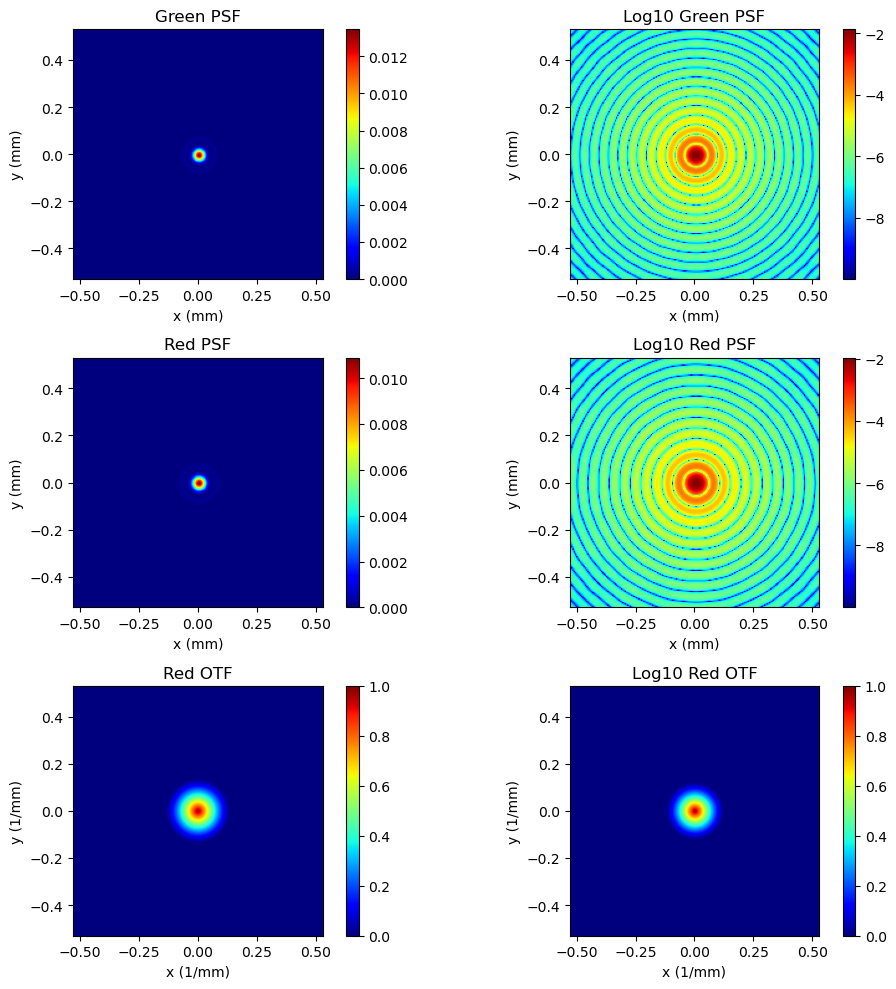

In [50]:
zi = 300  # mm
r = 2  # mm
wavelengths = {'green': 540E-6, 'red': 600E-6}  # nm

def simulate_psf(lambd):
    FX, FY = np.meshgrid(-lambd*zi*fx, -lambd*zi*fy)
    H = (FX**2 + FY**2) < r**2 
    h = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(H)))

    psf = np.abs(h)**2
    psf /= psf.sum()
    return psf


psf_green = simulate_psf(wavelengths['green'])
psf_red = simulate_psf(wavelengths['red'])

otf_green = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(psf_green)))
otf_red = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(psf_red)))
otf_green_abs = np.abs(otf_green)
otf_red_abs = np.abs(otf_red)


center = grid // 2
zoom = 100
psf_green_zoom = psf_green[center-zoom:center+zoom+1, center-zoom:center+zoom+1]
psf_red_zoom = psf_red[center-zoom:center+zoom+1, center-zoom:center+zoom+1]

extent = np.array([x.min(), x.max(), y.min(), y.max()])
zoom = np.divide(extent, 5.0)

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

im00 = axs[0, 0].imshow(psf_green_zoom, cmap='jet', extent=zoom)
axs[0, 0].set_title("Green PSF")
axs[0, 0].set_xlabel("x (mm)")
axs[0, 0].set_ylabel("y (mm)")
fig.colorbar(im00, ax=axs[0, 0])

im01 = axs[0, 1].imshow(np.log10(psf_green_zoom + 1e-10), cmap='jet', extent=zoom)
axs[0, 1].set_title("Log10 Green PSF")
axs[0, 1].set_xlabel("x (mm)")
axs[0, 1].set_ylabel("y (mm)")
fig.colorbar(im01, ax=axs[0, 1])

im10 = axs[1, 0].imshow(psf_red_zoom, cmap='jet', extent=zoom)
axs[1, 0].set_title("Red PSF")
axs[1, 0].set_xlabel("x (mm)")
axs[1, 0].set_ylabel("y (mm)")
fig.colorbar(im10, ax=axs[1, 0])

im11 = axs[1, 1].imshow(np.log10(psf_red_zoom + 1e-10), cmap='jet', extent=zoom)
axs[1, 1].set_title("Log10 Red PSF")
axs[1, 1].set_xlabel("x (mm)")
axs[1, 1].set_ylabel("y (mm)")
fig.colorbar(im11, ax=axs[1, 1])

im20 = axs[2, 0].imshow(otf_green_abs, cmap='jet', extent=zoom)
axs[2, 0].set_title("Red OTF")
axs[2, 0].set_xlabel("x (1/mm)")
axs[2, 0].set_ylabel("y (1/mm)")
fig.colorbar(im20, ax=axs[2, 0])

im21 = axs[2, 1].imshow(otf_red_abs, cmap='jet', extent=zoom)
axs[2, 1].set_title("Log10 Red OTF")
axs[2, 1].set_xlabel("x (1/mm)")
axs[2, 1].set_ylabel("y (1/mm)")
fig.colorbar(im21, ax=axs[2, 1])

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<font color=black>

3. Simulate what the star pattern looks like when the system is illuminated with red light and green light. What is the difference between the two images? How does wavelength affect the resolution of the system?
</font> 
</div>

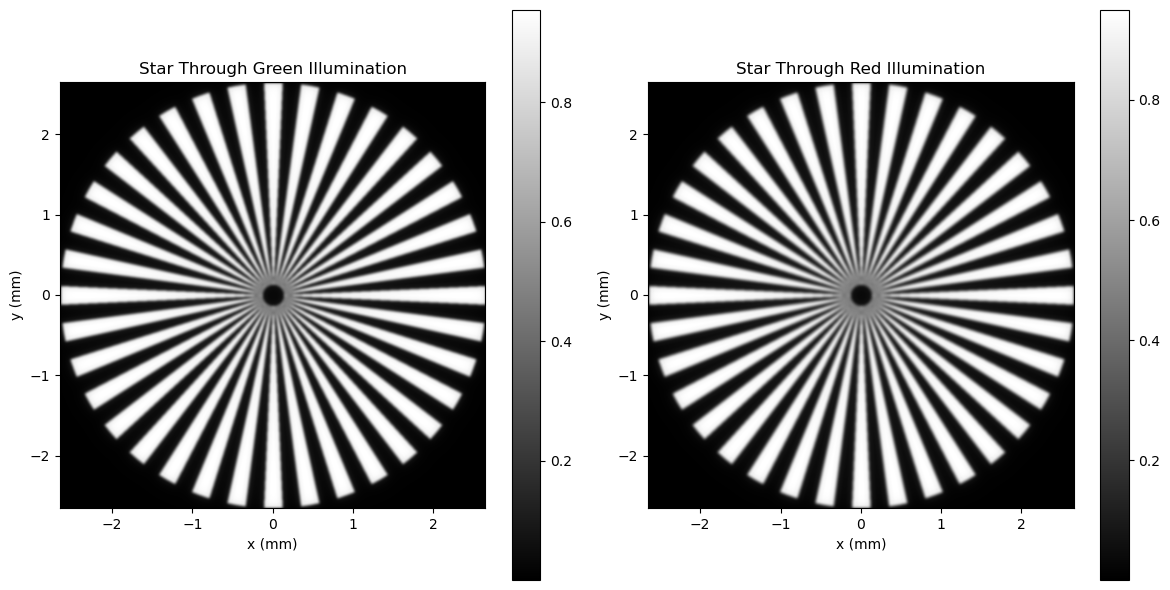

In [51]:
from functions import make_star
from scipy.signal import fftconvolve

star = make_star(x, y)

star_red = fftconvolve(star, psf_red, mode='same')
star_green = fftconvolve(star, psf_green, mode='same')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
im0 = axs[0].imshow(star_green, cmap='gray', extent=extent)
axs[0].set_title("Star Through Green Illumination")
axs[0].set_xlabel("x (mm)")
axs[0].set_ylabel("y (mm)")
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(star_red, cmap='gray', extent=extent)
axs[1].set_title("Star Through Red Illumination")
axs[1].set_xlabel("x (mm)")
axs[1].set_ylabel("y (mm)")
fig.colorbar(im1, ax=axs[1])

plt.tight_layout()
plt.show()

We observe that with the green illumination we can resolve finer details which is especialy apparent in the center of the start. This is because of its shorter wavelength and thus higher frequency which allows it to preserve these features. Meanwhile, the longer wavelength and lower frequency does not preserve small details in the star.

# Generalized Pupil Function - Phase 

<div class="alert alert-block alert-warning">
<font color=black>

Download `zernike.py` and `zernike_index.npy` from Blackboard Lab 4 Course Content. The zernike function yields the weighted sum of multiple Zernike polynomials. You may import the `zernike` function using the following command:

`from zernike import zernike`

The syntax of the function is as follows: <br/>

`z_sum = zernike(-lambd*zi*fx/r, -lambd*zi*fy/r, mode_indices, coefs)`
    
where `mode_indices` a vector of the mode indices, and `coefs` are the coefficients for the Zernike polynomials at the corresponding mode index.
</font> 
</div>

<div class="alert alert-block alert-warning">
<font color=black>

In the notes, Zernike polynomials are indicated by $Z_n^m$, where $n$ is the order, and $m$ is the frequency. The mode index `i` (using the Noll index convention) is another way of indexing the polynomials and is related to $n$,$m$ via the following table for the few polynomials we will be using today. 
</font> 
</div>

<img src="Lab4\Zernike.png" style="width:800px">

<div class="alert alert-block alert-warning">
<font color=black>

For example, to get the Zernike polynomial of x-tilt of coefficient 1, defocus of coefficient 2, and y-coma of coefficient 3, you could specify the `mode_indices` and `coefs` as follows: 
    
`mode_indices = [2, 4, 7]` <br/>
`coefs = [1, 2, 3]`
    
The phase portion of the Fourier transform of `h` is then given by <br/>
`np.exp(-1j*2*np.pi*z_sum)`<br/>
    
To combine the amplitude and phase, we can do the following, which gives us the Fourier transform of $h$ with phase aberrations: <br/>
`H*np.exp(-1j*2*np.pi*z_sum)`<br/>

You can then compute $h$ via an inverse Fourier transform, take the absolute value squared to obtain the incoherent point spread function. <br/>

Now let’s simulate several aberrations and see how they affect the image. <u>For all simulations below, set the wavelength to green at 540 nm.</u> Keep system parameters like pupil radius and distance from lens to camera the same as the red/green PSF experiment above. <br/>
</font> 
</div>

<div class="alert alert-block alert-success">
<font color=black>

1. Simulate an x-tilt of coefficient 0.5. Show images of the PSF and log10 PSF, both zoomed in on the central 201 by 201 elements. Also show the absolute value of the OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image.

</font> 
</div>

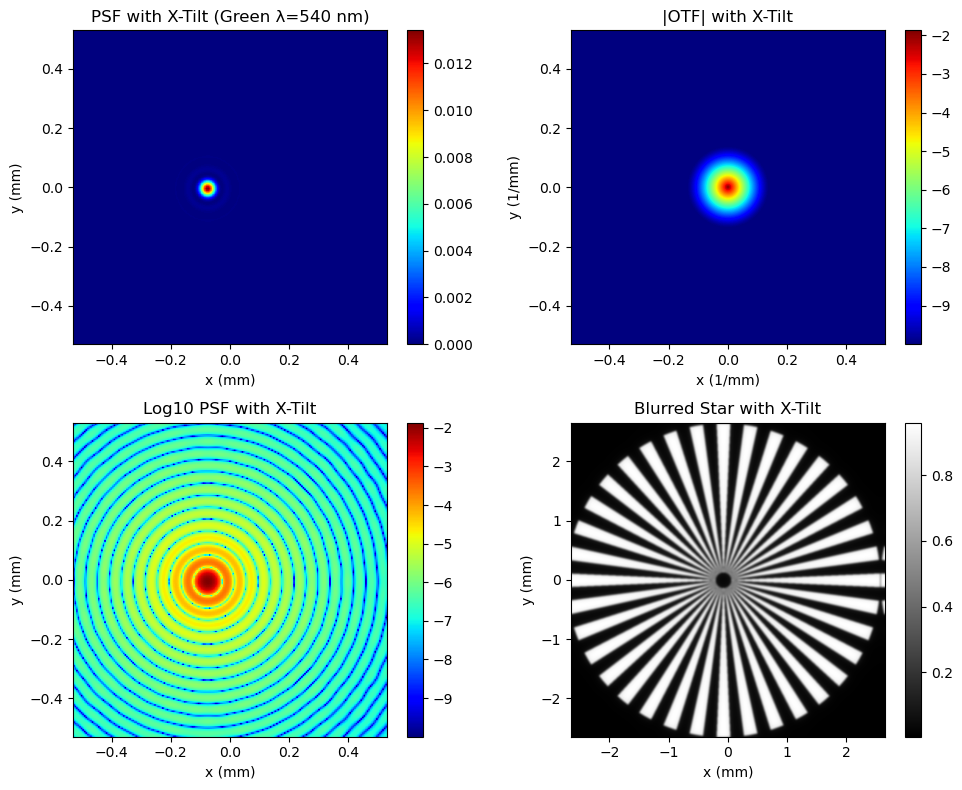

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from zernike import zernike

grid = 1001
dx = 0.0053  # mm


def simulate_psf_with_aberration(lambd):
    FX, FY = np.meshgrid(-lambd*zi*fx, -lambd*zi*fy)
    H_amp = (FX**2 + FY**2) < r**2

    z_sum = zernike(-lambd*zi*fx / r,  -lambd*zi*fy/ r, [2], [0.5])
    phase = np.exp(-1j * 2 * np.pi * z_sum)

    H = H_amp * phase

    h = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(H)))
    psf = np.abs(h)**2
    psf /= psf.sum()

    otf = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(psf)))

    return psf, otf


psf_green, otf_green = simulate_psf_with_aberration(wavelengths['green'])
otf_abs = np.abs(otf_green)

center = grid // 2
zoom = 100
psf_green_zoom = psf_green[center - zoom:center + zoom + 1, center - zoom:center + zoom + 1]

extent = np.array([x.min(), x.max(), y.min(), y.max()])
zoom_extent = extent / 5.0

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

im0 = axs[0, 0].imshow(psf_green_zoom, cmap='jet', extent=zoom_extent)
axs[0, 0].set_title("PSF with X-Tilt (Green λ=540 nm)")
axs[0, 0].set_xlabel("x (mm)")
axs[0, 0].set_ylabel("y (mm)")
fig.colorbar(im0, ax=axs[0, 0])

im1 = axs[1, 0].imshow(np.log10(psf_green_zoom + 1e-10), cmap='jet', extent=zoom_extent)
axs[1, 0].set_title("Log10 PSF with X-Tilt")
axs[1, 0].set_xlabel("x (mm)")
axs[1, 0].set_ylabel("y (mm)")
fig.colorbar(im1, ax=axs[1, 0])

im2 = axs[0, 1].imshow(otf_abs, cmap='jet', extent=zoom_extent)
axs[0, 1].set_title("|OTF| with X-Tilt")
axs[0,1].set_xlabel("x (1/mm)")
axs[0, 1].set_ylabel("y (1/mm)")
fig.colorbar(im1, ax=axs[0, 1])

star_fft = np.fft.fft2(star)
psf_fft = np.fft.fft2(np.fft.ifftshift(psf_green))
blurred_star = np.real(np.fft.ifft2(star_fft * psf_fft))

im3 = axs[1, 1].imshow(blurred_star, cmap='gray', extent=extent)
axs[1, 1].set_title("Blurred Star with X-Tilt")
axs[1, 1].set_xlabel("x (mm)")
axs[1, 1].set_ylabel("y (mm)")
fig.colorbar(im3, ax=axs[1, 1])

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<font color=black>

2. Simulate an x-tilt of coefficient -1.3 and a y-tilt of coefficient 0.7. Show the PSF and log10 PSF, both zoomed in on the central 201 by 201 elements. Also plot the absolute value of the OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image and compare to the previously simulated aberration.

</font> 
</div>

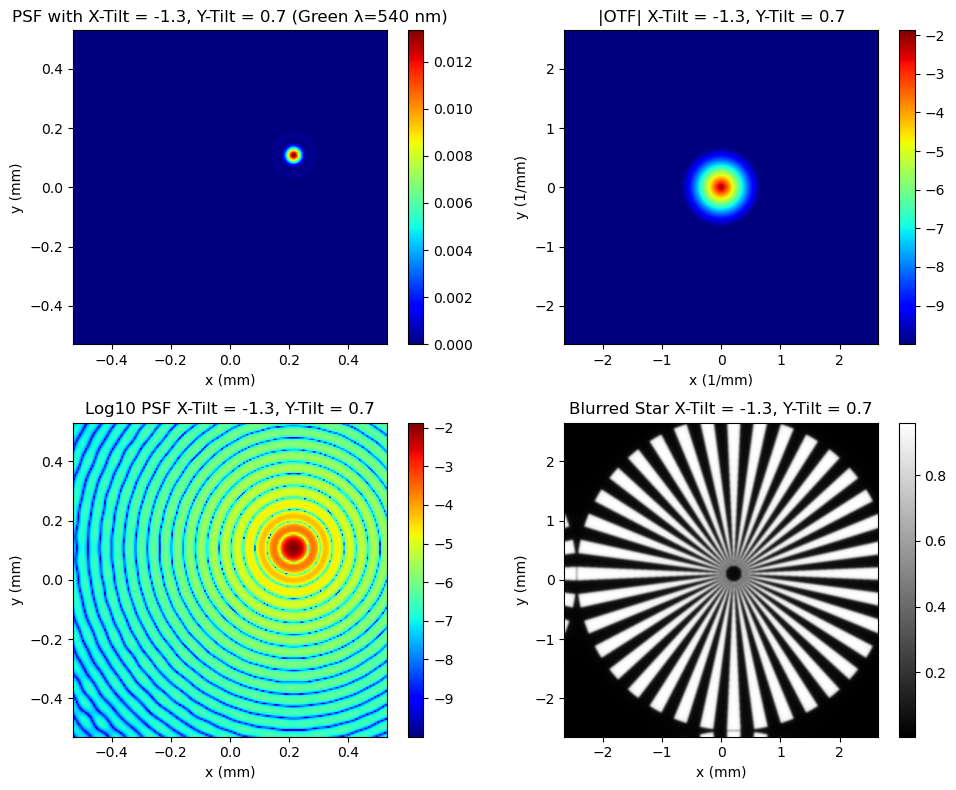

In [ ]:
grid = 1001
dx = 0.0053  # mm


def simulate_psf_with_aberration(lambd):
    FX, FY = np.meshgrid(-lambd*zi*fx, -lambd*zi*fy)
    H_amp = (FX**2 + FY**2) < r**2

    z_sum = zernike(-lambd*zi*fx / r,  -lambd*zi*fy/ r, [2, 3], [-1.3, 0.7])
    phase = np.exp(-1j * 2 * np.pi * z_sum)

    H = H_amp * phase


    h = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(H)))
    psf = np.abs(h)**2
    psf /= psf.sum()

    otf = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(psf)))

    return psf, otf

# Simulate aberrated PSF
psf_green, otf_green = simulate_psf_with_aberration(wavelengths['green'])
otf_abs = np.abs(otf_green)

# Center and zoom
center = grid // 2
zoom = 100
psf_green_zoom = psf_green[center - zoom:center + zoom + 1, center - zoom:center + zoom + 1]

# Axes for plotting
extent = np.array([x.min(), x.max(), y.min(), y.max()])
zoom_extent = extent / 5.0

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

im0 = axs[0, 0].imshow(psf_green_zoom, cmap='jet', extent=zoom_extent)
axs[0, 0].set_title("PSF with X-Tilt = -1.3, Y-Tilt = 0.7 (Green λ=540 nm)")
axs[0, 0].set_xlabel("x (mm)")
axs[0, 0].set_ylabel("y (mm)")
fig.colorbar(im0, ax=axs[0, 0])

im1 = axs[1, 0].imshow(np.log10(psf_green_zoom + 1e-10), cmap='jet', extent=zoom_extent)
axs[1, 0].set_title("Log10 PSF X-Tilt = -1.3, Y-Tilt = 0.7")
axs[1, 0].set_xlabel("x (mm)")
axs[1, 0].set_ylabel("y (mm)")
fig.colorbar(im1, ax=axs[1, 0])

im2 = axs[0, 1].imshow(otf_abs, cmap='jet', extent=extent)
axs[0, 1].set_title("|OTF| X-Tilt = -1.3, Y-Tilt = 0.7")
axs[0,1].set_xlabel("x (1/mm)")
axs[0, 1].set_ylabel("y (1/mm)")
fig.colorbar(im1, ax=axs[0, 1])

star_fft = np.fft.fft2(star)
psf_fft = np.fft.fft2(np.fft.ifftshift(psf_green))
blurred_star = np.real(np.fft.ifft2(star_fft * psf_fft))

im3 = axs[1, 1].imshow(blurred_star, cmap='gray', extent=extent)
axs[1, 1].set_title("Blurred Star X-Tilt = -1.3, Y-Tilt = 0.7")
axs[1, 1].set_xlabel("x (mm)")
axs[1, 1].set_ylabel("y (mm)")
fig.colorbar(im3, ax=axs[1, 1])

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<font color=black>

3. Simulate a defocus of coefficient `1/(np.sqrt(3)*2)`, (This number represents exactly one wavelength of defocus). Show the PSF and log10 PSF, both zoomed in on the central 201 by 201 elements. Also plot the BOTH the real values and absolute values of the OTF, as well as the star pattern blurred by this system. What do you observe in the star pattern in terms of the bright and dark spokes as you go from the periphery to the center of the image? What is causing this? (Hint: look at the real-valued OTF.)

</font> 
</div>

<div class="alert alert-block alert-success">
<font color=black>

4. Simulate a defocus of coefficient 0.5. Show the PSF and log10 PSF, both zoomed in on the central 201 by 201 elements. Also plot the real values and absolute values of the OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image and compare to the previous defocus simulation.

</font> 
</div>

<div class="alert alert-block alert-success">
<font color=black>

5. Simulate a y-coma of coefficient 0.1. Show the PSF and log10 PSF images, both zoomed in on the central 201 by 201 elements. Also plot the real values and absolute values of the OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image.

</font> 
</div>

<div class="alert alert-block alert-success">
<font color=black>

6. Simulate an x-coma of coefficient -0.2 together with a y-coma of coefficient 0.05. Show the PSF and log10 PSF images, both zoomed in on the central 201 by 201 elements. Also plot the real values and absolute values of the OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image and compare to the previously simulated aberration.

</font> 
</div>

<div class="alert alert-block alert-success">
<font color=black>

7. One last simulation! Let’s look at the composition of many aberrations together. Simulate mode indices `[4, 5, 6, 7, 11]` with coefficients `[0.1, -0.2, 0.05, 0.2, 0.1]`. Show the PSF and log10 PSF images, both zoomed in on the central 201 by 201 elements. Also plot the real values and absolute values of OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image.

</font> 
</div>